# On the Convergence of Hull White Monte Carlo Simulations

Hull-White 短期利率模型與蒙特卡洛模擬的收斂性問題。Hull-White 模型用來模擬利率的變動，而蒙特卡洛模擬則是一種數值解法，能夠模擬出大量的可能情況以計算期望值。Hull-White 模型的公式為：

drt=(θ(t)−art)dt+σdWt

其中，a 和 σ 是常數，θ(t) 是為了擬合利率期限結構所選擇的函數。文章中的代碼首先建立了 Hull-White 模型，然後使用蒙特卡洛模擬產生一系列模擬路徑，進行收斂性分析。

In [8]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 定義常數
a = 0.1
sigma = 0.01
timestep = 360 # 模擬的時間步長
length = 30 # years
forward_rate = 0.05 # 初始的短期利率
day_count = ql.Actual365Fixed() # 利率的計算方式，每年 365 天
todays_date = ql.Date(15, 1, 2015)

In [3]:
# 設定評價工具的計算日期
ql.Settings.instance().evaluationDate = todays_date

In [4]:
# 建立模型參數
spot_curve = ql.FlatForward(todays_date, ql.QuoteHandle(ql.SimpleQuote(forward_rate)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)

In [5]:
# 建立 Hull-White 
hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)

# 用 hw 生成路徑
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, length, timestep, rng, False)

In [7]:
# 產生一條路徑
def generate_sample_path(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

num_paths = 500
time, paths = generate_sample_path(num_paths, timestep)    

可以利用 matplotlib.pyplot 的 plot 函數劃出每一條模擬的路徑。我們可以只選取前 10 條路徑作為示例。

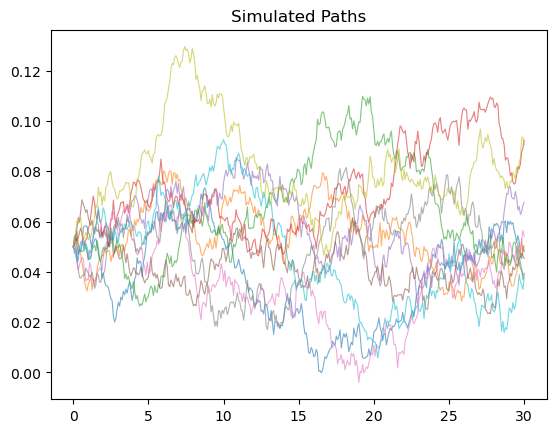

In [9]:
# 劃出前 10 條模擬的路徑
for i in range(10):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
plt.title('Simulated Paths')
plt.show()


可以看到這些路徑在隨機震盪中顯示出一定的趨勢。然而，單從這些路徑中，我們並不能夠直觀地看出蒙特卡洛模擬是否收斂。為了檢查收斂性，我們可以計算所有模擬路徑的平均路徑，並將其與實際的期望路徑進行比較。

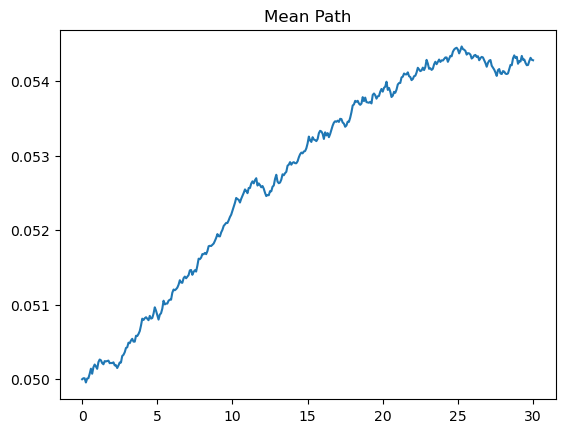

In [10]:
# 計算平均路徑
mean_path = np.mean(paths, axis=0)

# 劃出平均路徑
plt.plot(time, mean_path, label='Mean Path')
plt.title('Mean Path')
plt.show()

文章主要討論了以下幾個方面：

dr(t) = (θ(t) - a*r(t)) dt + σ dW(t)


1. 蒙特卡洛模擬的收斂性如何受到模型參數a和σ的影響。從圖中可以看出，當σ/a < 1時，模擬的收斂性良好；而當σ/a > 1時，模擬的收斂性會變差。
2. 在蒙特卡洛模擬中，估計市場折現因子的方式是通過每條蒙特卡洛路徑的折現因子的期望值來進行的。如果折現因子的分佈有一個標準差σD，那麼我們估計P^{MC}(t,T)的誤差將與σD/√N相關，其中N是蒙特卡洛路徑的數量。因此，我們可以通過增加蒙特卡洛路徑的數量來提高模擬的收斂性，但同時，σD需要相對較小才能獲得良好的估計。
3. 透過對短期利率的積分可以證明其為正態分佈。並給出了對應的數學公式：

∫Ttr(u)du|t∼(B(t,T)[r(t)−α(t)]+lnPM(0,t)PM(0,T)+12[V(0,T)−V(0,t)],V(t,T))

其中 B(t,T) 和 V(t,T) 為特定的計算公式，詳見文章。


由於折現因子的分佈具有對數正態分佈，因此其標準差σD可以用公式PM(t,T)eV(t,T)−1來估計。因此，若參數σ和a的選擇不當（即σ/a >1），那麼模擬的收斂性可能會變差，結果可能不可靠。
這些討論都基於蒙特卡洛模擬和Hull-White模型的數學公式，對於瞭解這種模擬如何工作以及如何改進其效果有著重要的作用。

很抱歉對於您的需求理解有誤，以下是您要求的公式，用 LaTeX 撰寫並用 Markdown 包裝：

Hull-White 短期利率模型的微分方程式：

```markdown
dr(t) = (θ(t) - a*r(t)) dt + σ dW(t)
```

其中 $a$ 和 $\sigma$ 是常數，而 $\theta(t)$ 是為了符合期望的利率結構而選定的函數。

市場折現因子與蒙特卡洛折現因子的比較：

```markdown
P_M(t,T) = \exp(-\int_{t}^{T} f_M(t,u) du)

P_{MC}(t,T) = E_t \left\{ \exp(-\int_{t}^{T} r_{MC}(u) du) \right\}
```

其中 $f_M(t, T)$ 是市場隱含的即期遠期利率，$r_{MC}(s)$ 是從蒙特卡洛模擬中得到的即期短期利率。

蒙特卡洛模擬的誤差定義為：

```markdown
ϵ(T) = P_M(0,T) - P_{MC}(0,T)
```

短期利率的積分在條件下的分佈為：

```markdown
\int_{t}^{T} r(u) du | F_t \sim N\left(B(t,T)[r(t)-α(t)] + \ln\left[\frac{P_M(0,t)}{P_M(0,T)}\right] + \frac{1}{2}[V(0,T) - V(0,t)], V(t,T)\right)
```

其中 $B(t, T)$ 和 $V(t, T)$ 給出如下：

```markdown
B(t,T) = \frac{1}{a} [1 - \exp(-a(T-t))]

V(t,T) = \frac{\sigma^2}{a^2} [T - t + \frac{2}{a} \exp(-a(T-t)) - \frac{1}{2a} \exp(-2a(T-t)) - \frac{3}{2a}]
```

根據上述結果，蒙特卡洛模擬的折現因子：

```markdown
P_{MC}(t,T) = \exp(-\int_{t}^{T} r(u) du | F_t)
```

將有一個對數正態分佈，其標準差：

```markdown
σ_D(t,T) = P_M(t,T) \exp[V(t,T)] - 1
```

在 $T \rightarrow \infty$ 的極限下的估計為：

```markdown
σ_D(0,T) ≈ P_M(0,T) \exp\left[\frac{f_M(0,T)}{a} - \frac{\sigma^2}{4a^3} \exp\left(\frac{\sigma^2 T}{a^2}\right) - 1\right]
```

這些公式提供了對蒙特卡洛模擬在 Hull-White 模型中收斂性的理論基礎。